# Assignment 3 Part 1
Grayson Hineline

Note for portfolio: This is a fun project. In this Part 1, I am tasked with slicing the images in two videos to reconstruct the photos. If you think of an image as a a bunch of images stacked on top of each other to form a box, these tasks were to out parts of that box in a slice such that an entirely new, warped image could be formed.

Import the things we'll need:

In [1]:
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt

### Part 1.1: Slicing Directly Across Time

The following CSV file contains an index of the `plaza` image set. These are just the frames of a video broken out into individual images to make them easier to work with. The index has columns for just the Filename and the full URL where the image lives.

In [2]:
plaza_index = pd.read_csv("https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_21f/data/plaza.csv")
plaza_index

,Filename,URL
0,plaza0001.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
1,plaza0002.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
2,plaza0003.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
3,plaza0004.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
4,plaza0005.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
...,...,...
445,plaza0446.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
446,plaza0447.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
447,plaza0448.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
448,plaza0449.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...


You can use `imageio.imread` to load an image directly from a URL into an array:

In [3]:
image0 = imageio.imread(plaza_index["URL"][0])

You can look at an image with `plt.imshow`:

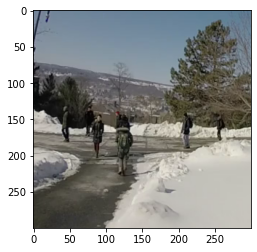

In [4]:
plt.imshow(image0)

Alright, so my goal here is to slice out a single column of pixels from each image of the df (or at least as many as I can given the size of the image), and then build an image using each of those columns. In slicing each column from the images, I want to do so such that each column being added to the new image is from a fixed placement in their original image (for example, all of the columns could be from the center column of the each image).

First I want to experiment with just extracting a column from the df.

In [5]:
image0.shape #I do this just to know for sure what the size of the image is so I slice correctly

(300, 300, 3)

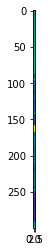

In [6]:
#I visualize the way I access any of the images pixels as image[row][column][channels]
plt.imshow(image0[ : ,100])

That seemed to work, so lets do it with a bunch of columns

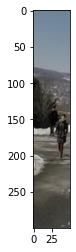

In [7]:
plt.imshow(image0[ : , 50:100])

Okay, so I know how to extract columns of an image and print them. Knowing that, here's my plan to build an image while slicing across time and holding the columns fixed: I'm going to copy the first image, then procedually replace every column of that original image with a single column from all of the other images, but always using the same index for that column that is the new replacement.

Here's the original image

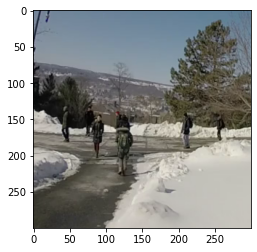

In [8]:
new = image0.copy()
plt.imshow(new)

This for loop iterates through every row of the dataframe (time), pulls out the image of that column, slices out the column with index 150 from that image, and then replaces a column of the new image with that sliced column. `i` stops at 300 because that is the limit of images we have to slice a single column from.

By holding the image slice constant (`150:151`) and by moving the index of where that slice is being placed in the new image, we build an image where the (y,x,z) x axis is time.

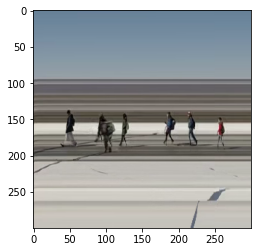

In [9]:
for i in range(0,301):
    image = imageio.imread(plaza_index["URL"][i])
    i2 = i+1
    new[:,i:i2] = image[:,150:151]
    
plt.imshow(new)

Woah look! I guest the placement i chose of using the middle `150` column made it so the moving people stayed in place but their surroundings didn't.

### Part 1.2: Slicing Diagonally Across Time and Space

Here's a similar index file to the NYC skyline image set that I used in the example in the lab handout:

In [10]:
ny_index = pd.read_csv("https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_21f/data/ny.csv")
ny_index

,Filename,URL
0,ny0001.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
1,ny0002.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
2,ny0003.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
3,ny0004.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
4,ny0005.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
...,...,...
833,ny0834.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
834,ny0835.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
835,ny0836.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...
836,ny0837.png,https://facultyweb.cs.wwu.edu/~wehrwes/courses...


In [11]:
image0 = imageio.imread(ny_index["URL"][0])
image0.shape

(480, 854, 3)

Knowing what I know from part one, what I can do is just let the placement of the new slice be the same as the index of the image in the dataframe. In otherwords, I can build an image where I don't the fix the columns, but rather each column is just pulled from a different original image.

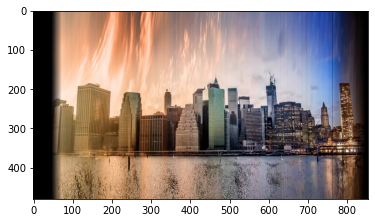

In [12]:
new = image0.copy()
for i in range(9,847): #Did this because the size of the video isn't the same as the size of the images columns axis.
    image = imageio.imread(ny_index["URL"][i-9])
    i2 = i+1
    new[:,i:i2] = image[:,i:i2]
    
plt.imshow(new)